Paquetes necesarios

In [3]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1: Crear una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

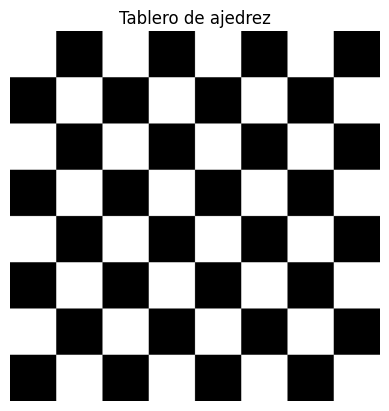

In [4]:
n = 8              
tam_casilla = 100  

ancho = alto = n * tam_casilla

tablero_img = np.zeros((alto,ancho,1), dtype = np.uint8)

for i in range(n):       # filas
    for j in range(n):   # columnas
        if (i + j) % 2 == 0:
            tablero_img[i*tam_casilla:(i+1)*tam_casilla,
                     j*tam_casilla:(j+1)*tam_casilla, 0] = 255  # blanco

#Muestra la imagen con matplotlib

plt.imshow(tablero_img, cmap='gray') 
plt.title("Tablero de ajedrez")
plt.axis("off")
plt.show()

TAREA 2: Crear una imagen estilo Mondrian

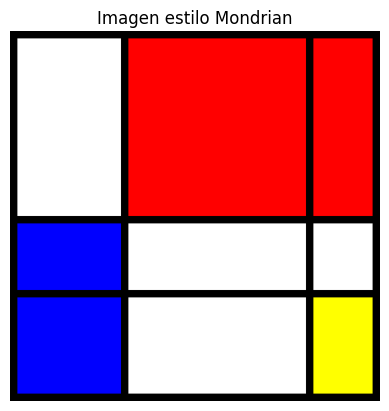

In [5]:

# Dimensiones de la imagen
alto = ancho = 500
modrian_img = np.ones((alto, ancho, 3), dtype=np.uint8) * 255   # fondo blanco

# Colores RGB
NEGRO   = (0, 0, 0)
ROJO    = (255, 0, 0)
AZUL    = (0, 0, 255)
AMARILLO= (255, 255, 0)
BLANCO  = (255, 255, 255)

# Grosor de las líneas
grosor = 10

# Rectángulo rojo grande (derecha arriba)
modrian_img[grosor:250, 150:ancho-grosor] = ROJO

# Rectángulo azul (abajo izquierda)
modrian_img[250+grosor:ancho-grosor, grosor:150] = AZUL

# Rectángulo amarillo (abajo derecha pequeño)
modrian_img[350:alto-grosor, ancho-100:ancho-grosor] = AMARILLO


# Añadir líneas negras (divisiones)
# Verticales
modrian_img[:, 150:150+grosor] = NEGRO
modrian_img[:, ancho-100:ancho-100+grosor] = NEGRO

# Horizontales
modrian_img[250:250+grosor, :] = NEGRO
modrian_img[350:350+grosor, :] = NEGRO
modrian_img[0:grosor, :] = NEGRO
modrian_img[:, 0:grosor] = NEGRO
modrian_img[alto-grosor:alto, :] = NEGRO
modrian_img[:, ancho-grosor:ancho] = NEGRO

# Mostrar imagen
plt.imshow(modrian_img)
plt.axis("off")
plt.title("Imagen estilo Mondrian")
plt.show()



TAREA 3: Hacer uso de las funciones de dibujo de OpenCV

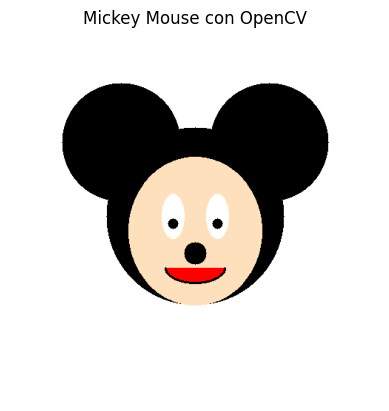

In [6]:
alto = ancho = 500
mickey_img = np.ones((alto, ancho, 3), dtype=np.uint8) * 255

# Colores
NEGRO = (0, 0, 0)
PIEL = (189, 224, 255)
ROJO  = (0, 0, 255)
BLANCO = (255, 255, 255)

# Orejas
cv2.circle(mickey_img, (150, 150), 80, NEGRO, -1)  
cv2.circle(mickey_img, (350, 150), 80, NEGRO, -1)  

# Cabeza
cv2.circle(mickey_img, (250, 250), 120, NEGRO, -1)

# Cara (un óvalo de color piel dentro)
cv2.ellipse(mickey_img, (250, 270), (90, 100), 0, 0, 360, PIEL, -1)

# Ojos
cv2.ellipse(mickey_img, (220, 250), (15, 30), 0, 0, 360, BLANCO, -1)
cv2.ellipse(mickey_img, (280, 250), (15, 30), 0, 0, 360, BLANCO, -1)

# Pupilas
cv2.circle(mickey_img, (220, 260), 7, NEGRO, -1)
cv2.circle(mickey_img, (280, 260), 7, NEGRO, -1)

# Nariz
cv2.circle(mickey_img, (250, 300), 15, NEGRO, -1)

# Boca
cv2.ellipse(mickey_img, (250, 320), (40, 20), 0, 0, 180, ROJO, -1)
cv2.ellipse(mickey_img, (250, 320), (40, 20), 0, 0, 180, NEGRO, 2)

# Mostrar resultado
plt.imshow(cv2.cvtColor(mickey_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Mickey Mouse con OpenCV")
plt.show()

TAREA 4: Modificar un plano de la imagen

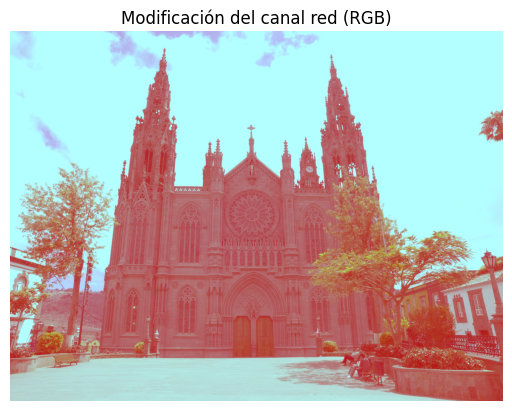

In [7]:
# Abrir una imagen cualquiera
iglesia_img = cv2.imread("iglesia.jpg")

# Separar canales BGR
b, g, r = cv2.split(iglesia_img)

# Modificación del plano "red" (RGB)
r[:] = 179

# Reconstruir la imagen
iglesia_img = cv2.merge([b,g,r])

plt.imshow(cv2.cvtColor(iglesia_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Modificación del canal red (RGB)")
plt.show()

TAREA 5: Destacar tanto el píxel con el color más claro como con el color más oscuro de una imagen

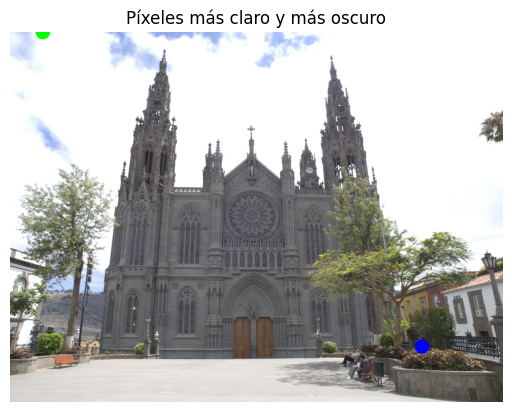

In [8]:
iglesia_img2 = cv2.imread("iglesia.jpg")

# Convertir a escala de grises
gray = cv2.cvtColor(iglesia_img2, cv2.COLOR_BGR2GRAY)

# Buscar posiciones del valor mínimo y máximo
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

# Marcar en la imagen original
img_marcada = iglesia_img2.copy()
cv2.circle(img_marcada, min_loc, 10, (255,0,0), 60)  # más oscuro AZUL
cv2.circle(img_marcada, max_loc, 10, (0,255,0), 60)  # más claro VERDE

plt.imshow(cv2.cvtColor(img_marcada, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Píxeles más claro y más oscuro")
plt.show()


TAREA 6: Hacer una propuesta pop art con la entrada de la cámara web o vídeo

In [9]:
import cv2
import numpy as np

def pop_art_simple(img):
    # 1) Reducir colores (posterización)
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)
    K = 4  # número de colores
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    img_quantized = centers[labels.flatten()].reshape(img.shape)

    # 2) Bordes negros estilo cómic
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    edges = cv2.bitwise_not(edges)
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    # 3) Combinar con bordes
    pop = cv2.bitwise_and(img_quantized, edges)

    return pop

# --- Webcam ---
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (300, 300))
    pop_frame = pop_art_simple(frame)

    cv2.imshow("Pop Art Simple", pop_frame)

    if cv2.waitKey(1) == 27:  # ESC para salir
        break

cap.release()
cv2.destroyAllWindows()
